# import statements

In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
from glob import glob
import librosa

# And the tf and keras framework, thanks to Google
import tensorflow as tf
from tensorflow import keras

In [2]:
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [3]:
def distance(point1, point2, n):
    """
    Calculate the Euclidean distance between two points.
    point1: list of floats
    point2: list of floats
    n: int, number of dimensions
    """
    distance = 0
    for x in range(n):
        distance += pow((point1[x] - point2[x]), 2)
    return math.sqrt(distance)

In [4]:
def k_nearest(trainset, instance, k):
    """
    Calculates the distance between the specified instance and the k nearest neighbors in the training set.
    trainset: a list of training instances
    instance: the instance to classify
    k: the number of neighbors to consider
    """
    distances = []
    for i in range(len(trainset)):
        dist = np.linalg.norm(np.array(instance) - np.array(trainset[i]))
    distances.sort()
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


# Loading in features and saving them as a csv file

In [5]:
# Load in the data from the train folder
train_files = glob('train/*')

# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
time_series = []
sampling_rates = []
#load the first 10 files
for i in range(0, 799):
    y, sr = librosa.load(train_files[i])
    time_series.append(y)
    sampling_rates.append(sr)


# convert the time series and sampling rates to a pandas dataframe
df = pd.DataFrame({'time_series': time_series})
# save the dataframe to a csv file
df.to_csv('time_series.csv', index=False)

In [6]:
print(type(time_series))
print(type(time_series[0]))

<class 'list'>
<class 'numpy.ndarray'>


# Basic feature extraction

In [8]:
def extract_features(series):
    """
    Uses Librosa to extract features from the time series.
    series: list of floats
    returns:
    spectral_centroid: the center of mass of the spectrum
    spectral rolloff: the frequency below which 85% of the magnitude distribution is concentrated
    spectral bandwidth: the width of the band of frequencies
    spectral contrast: the difference in amplitude between peaks and valleys in the spectrum
    spectral flatness: the flatness of a signal
    spectral rms: the root mean square of the signal
    """
    spectral_centroid = librosa.feature.spectral_centroid(y=series)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=series)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=series)
    spectral_contrast = librosa.feature.spectral_contrast(y=series)
    spectral_flatness = librosa.feature.spectral_flatness(y=series)
    spectral_rms = librosa.feature.rms(y=series)
    tempo, _ = librosa.beat.beat_track(y =series, sr = sr)
    return spectral_centroid, spectral_rolloff, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rms, tempo

centroids = []
rolloffs = []
bandwidths = []
contrasts = []
flatnesses = []
rms = []
tempos = []

for i in range(0, 799):
    spectral_centroid, spectral_rolloff, spectral_bandwidth, spectral_contrast, spectral_flatness, spectral_rms, tempo = extract_features(time_series[i])
    centroids.append(spectral_centroid)
    rolloffs.append(spectral_rolloff)
    bandwidths.append(spectral_bandwidth)
    contrasts.append(spectral_contrast)
    flatnesses.append(spectral_flatness)
    rms.append(spectral_rms)
    tempos.append(tempo)

# convert the features to a pandas dataframe

    



# Plot features of one of the columns in the dataset

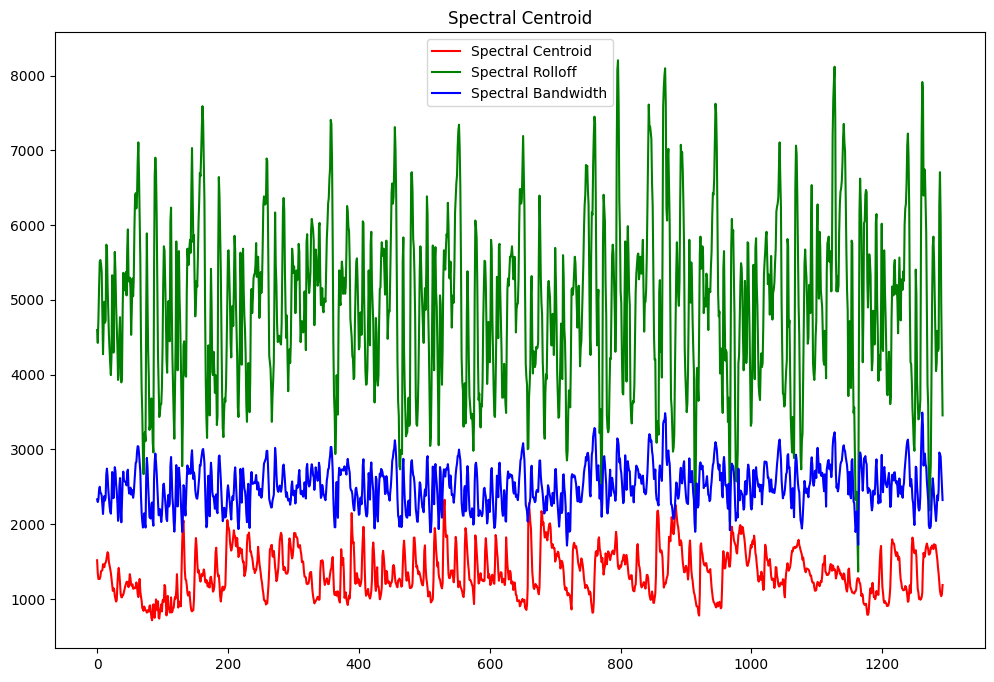

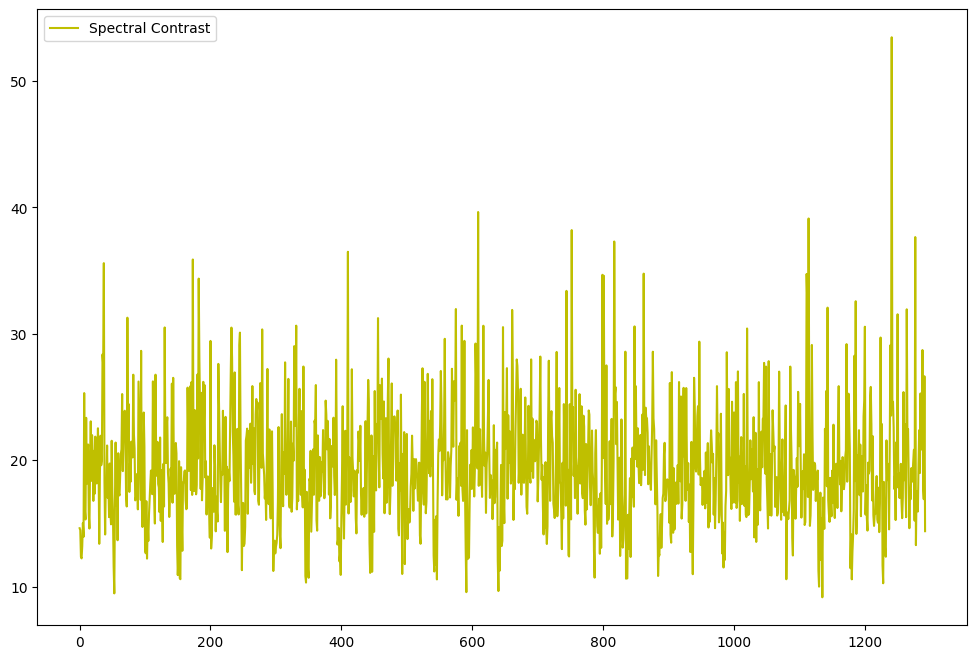

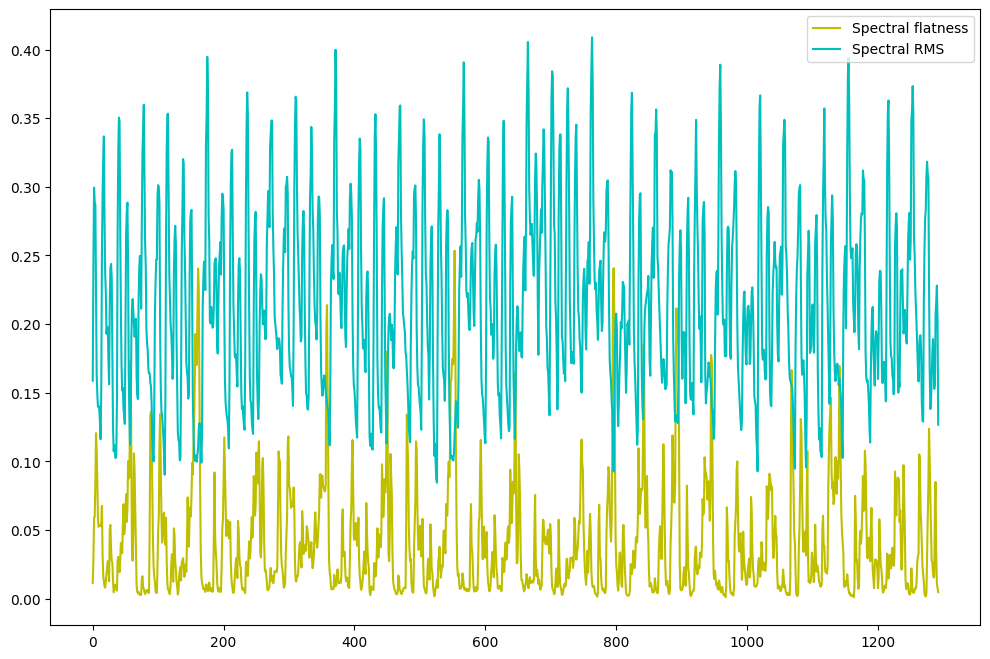

# Store and display the spectral centroids

# Plot all the features from features.csv

NameError: name 'fft_features' is not defined

# Rhythm extraction

# Graph the rhythm features

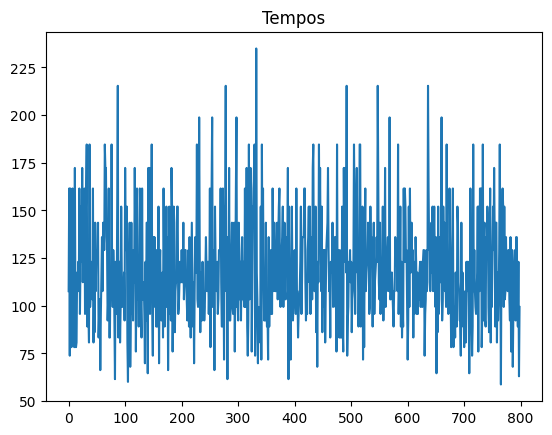

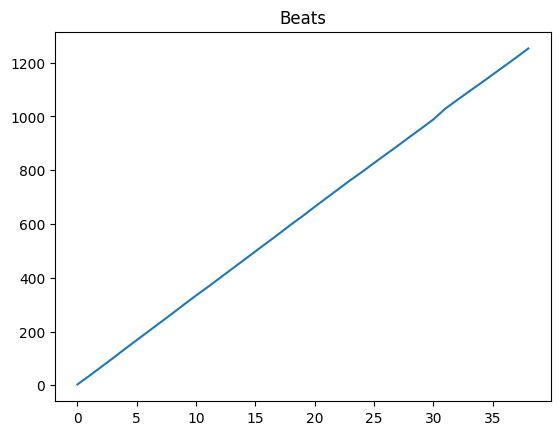

In [16]:


centroid_means = []
rolloff_means = []
bandwidth_means = []
contrast_means = []
flatness_means = []
rms_means = []

centroid_stds = []
rolloff_stds = []
bandwidth_stds = []
contrast_stds = []
flatness_stds = []
rms_stds = []

centroid_maxs = []
rolloff_maxs = []
bandwidth_maxs = []
contrast_maxs = []
flatness_maxs = []
rms_maxs = []

centroid_mins = []
rolloff_mins = []
bandwidth_mins = []
contrast_mins = []
flatness_mins = []
rms_mins = []



for i in range(0, 799):
    centroid_means.append(np.mean(centroids[i]))
    rolloff_means.append(np.mean(rolloffs[i]))
    bandwidth_means.append(np.mean(bandwidths[i]))
    contrast_means.append(np.mean(contrasts[i]))
    flatness_means.append(np.mean(flatnesses[i]))
    rms_means.append(np.mean(rms[i]))
    centroid_stds.append(np.std(centroids[i]))
    rolloff_stds.append(np.std(rolloffs[i]))
    bandwidth_stds.append(np.std(bandwidths[i]))
    contrast_stds.append(np.std(contrasts[i]))
    flatness_stds.append(np.std(flatnesses[i]))
    rms_stds.append(np.std(rms[i]))
    centroid_maxs.append(np.max(centroids[i]))
    rolloff_maxs.append(np.max(rolloffs[i]))
    bandwidth_maxs.append(np.max(bandwidths[i]))    
    contrast_maxs.append(np.max(contrasts[i]))
    flatness_maxs.append(np.max(flatnesses[i]))
    rms_maxs.append(np.max(rms[i]))
    centroid_mins.append(np.min(centroids[i]))
    rolloff_mins.append(np.min(rolloffs[i]))
    bandwidth_mins.append(np.min(bandwidths[i]))
    contrast_mins.append(np.min(contrasts[i]))
    flatness_mins.append(np.min(flatnesses[i]))
    rms_mins.append(np.min(rms[i]))

features = [centroid_means, rolloff_means, bandwidth_means, contrast_means, flatness_means, rms_means, centroid_stds, rolloff_stds, bandwidth_stds, contrast_stds, flatness_stds, rms_stds, centroid_maxs, rolloff_maxs, bandwidth_maxs, contrast_maxs, flatness_maxs, rms_maxs, centroid_mins, rolloff_mins, bandwidth_mins, contrast_mins, flatness_mins, rms_mins, tempos]
print(type(features[24]))
df = pd.DataFrame({'features': features})
df = df.transpose()



# Save the features to a csv file
df = pd.DataFrame({'centroid_means': centroid_means})
df.to_csv('features/centroid_means.csv', index=False)
df = pd.DataFrame({'rolloff_means': rolloff_means})
df.to_csv('features/rolloff_means.csv', index=False)
df = pd.DataFrame({'bandwidth_means': bandwidth_means})
df.to_csv('features/bandwidth_means.csv', index=False)
df = pd.DataFrame({'contrast_means': contrast_means})
df.to_csv('features/contrast_means.csv', index=False)
df = pd.DataFrame({'flatness_means': flatness_means})
df.to_csv('features/flatness_means.csv', index=False)
df = pd.DataFrame({'rms_means': rms_means})
df.to_csv('features/rms_means.csv', index=False)
df = pd.DataFrame({'centroid_stds': centroid_stds})
df.to_csv('features/centroid_stds.csv', index=False)
df = pd.DataFrame({'rolloff_stds': rolloff_stds})
df.to_csv('features/rolloff_stds.csv', index=False)
df = pd.DataFrame({'bandwidth_stds': bandwidth_stds})
df.to_csv('features/bandwidth_stds.csv', index=False)
df = pd.DataFrame({'contrast_stds': contrast_stds})
df.to_csv('features/contrast_stds.csv', index=False)
df = pd.DataFrame({'flatness_stds': flatness_stds})
df.to_csv('features/flatness_stds.csv', index=False)
df = pd.DataFrame({'rms_stds': rms_stds})
df.to_csv('features/rms_stds.csv', index=False)
df = pd.DataFrame({'centroid_maxs': centroid_maxs})
df.to_csv('features/centroid_maxs.csv', index=False)
df = pd.DataFrame({'rolloff_maxs': rolloff_maxs})
df.to_csv('features/rolloff_maxs.csv', index=False)
df = pd.DataFrame({'bandwidth_maxs': bandwidth_maxs})
df.to_csv('features/bandwidth_maxs.csv', index=False)
df = pd.DataFrame({'contrast_maxs': contrast_maxs})
df.to_csv('features/contrast_maxs.csv', index=False)
df = pd.DataFrame({'flatness_maxs': flatness_maxs})
df.to_csv('features/flatness_maxs.csv', index=False)
df = pd.DataFrame({'rms_maxs': rms_maxs})
df.to_csv('features/rms_maxs.csv', index=False)
df = pd.DataFrame({'centroid_mins': centroid_mins})
df.to_csv('features/centroid_mins.csv', index=False)
df = pd.DataFrame({'rolloff_mins': rolloff_mins})
df.to_csv('features/rolloff_mins.csv', index=False)
df = pd.DataFrame({'bandwidth_mins': bandwidth_mins})
df.to_csv('features/bandwidth_mins.csv', index=False)
df = pd.DataFrame({'contrast_mins': contrast_mins})
df.to_csv('features/contrast_mins.csv', index=False)
df = pd.DataFrame({'flatness_mins': flatness_mins})
df.to_csv('features/flatness_mins.csv', index=False)
df = pd.DataFrame({'rms_mins': rms_mins})
df.to_csv('features/rms_mins.csv', index=False)
df = pd.DataFrame({'tempos': tempos})
df.to_csv('features/tempos.csv', index=False)






<class 'list'>


# Running the code through KMeans Clustering and plotting the results via PCA

(799, 25)


C:\Users\tapic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


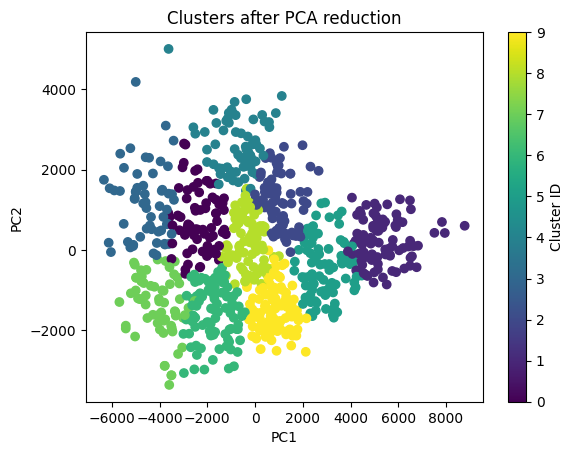

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

# Convert list of features to numpy array
features = np.array(features)
features = features.transpose()
print(features.shape)
# Create a KMeans instance
kmeans = KMeans(n_clusters=10)  # choose the appropriate number of clusters

# Fit the model to the data
kmeans.fit(features)

# Get the cluster assignments for each instance
cluster_assignments = kmeans.labels_

# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Create a scatter plot of the reduced data
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_assignments, cmap='viridis')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters after PCA reduction')
plt.colorbar(label='Cluster ID')

plt.show()

# Labeling the features and plotting them with PCA

In [23]:
train = pd.read_csv('train.csv')

# get only the column with the labels
labels = train['Genre']
# append labels to the features
features = np.column_stack((features, labels))
print(features)


[[2327.3042886281555 4929.812855731583 2516.6762247449906 ... 'pop' 'pop'
  'pop']
 [1355.7633128128734 2522.165929524362 1615.6700685886426 ... 'classical'
  'classical' 'classical']
 [1382.8810941606785 2833.0734075913574 1643.4574815650176 ... 'jazz'
  'jazz' 'jazz']
 ...
 [1545.830177769491 2722.1682519757833 1580.9169691785182 ... 'jazz'
  'jazz' 'jazz']
 [1070.1534179991847 2184.8790286035382 1596.422564648525 ... 'blues'
  'blues' 'blues']
 [1311.144563236089 2723.742024361949 1446.2128273817568 ... 'jazz'
  'jazz' 'jazz']]
